In [266]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import math
import seaborn as sns 

In [267]:
df = pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [268]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [269]:
# Removing UnNamed0 from head

df= df[['Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price']]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [270]:
#checing null value  
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [271]:
#checking duplicated value 
df.duplicated().sum()

29

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [273]:
catvars = df.select_dtypes(include=['object']).columns
numvars = df.select_dtypes(include=['int32','int64','float32','float64'])

catvars,numvars

(Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
        'Gpu', 'OpSys', 'Weight'],
       dtype='object'),
       Inches        Price
 0       13.3   71378.6832
 1       13.3   47895.5232
 2       15.6   30636.0000
 3       15.4  135195.3360
 4       13.3   96095.8080
 ...      ...          ...
 1298    14.0   33992.6400
 1299    13.3   79866.7200
 1300    14.0   12201.1200
 1301    15.6   40705.9200
 1302    15.6   19660.3200
 
 [1303 rows x 2 columns])

In [274]:
# print the unique values in every column


def uniquevals(col):
    print(f'Details of the particular col {col} is :',df[col].unique())

def valuecounts(col):
    print(f'Details of the particular col {col} is : ' , df[col].value_counts())

#for loop (col in df columns)
for col in df.columns:
    uniquevals(col)
    print("-"*75) 

Details of the particular col Company is : ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
---------------------------------------------------------------------------
Details of the particular col TypeName is : ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
---------------------------------------------------------------------------
Details of the particular col Inches is : [13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]
---------------------------------------------------------------------------
Details of the particular col ScreenResolution is : ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 19

In [275]:
''' will remove 'Gb' and 'Kg' from "Ram" , and "Weight" 
then we covert it from string to intiger 
'''
df['Ram']= df['Ram'].astype(str).str.replace('GB',' ')
df['Weight']= df['Weight'].astype(str).str.replace('kg',' ')

## Convert from str to int

df['Ram'] =df['Ram'].astype('int32')
df['Weight'] =df['Weight'].astype('float32')

In [276]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


## Exploratory Data Analysis

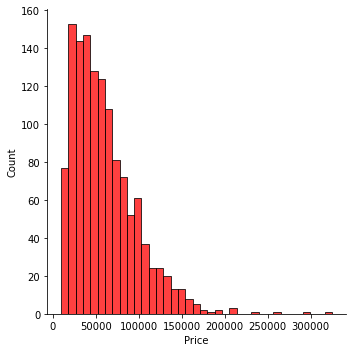

In [277]:
# Distribution of the price coulmn 
sns.displot(df['Price'],color='red')


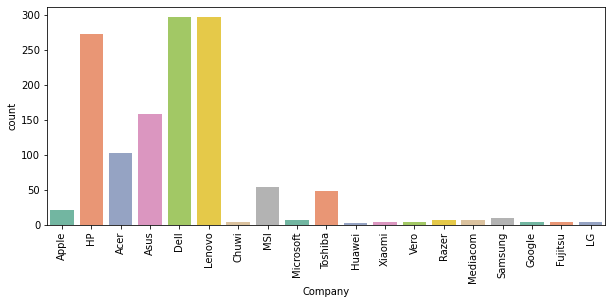

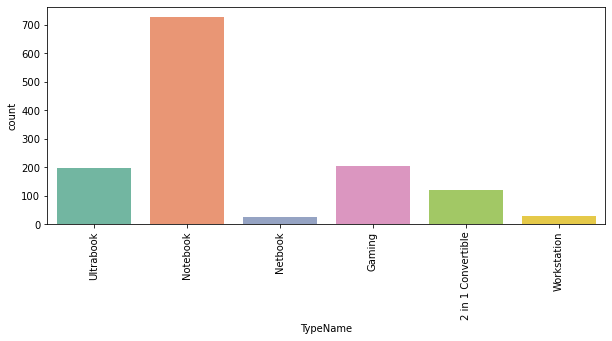

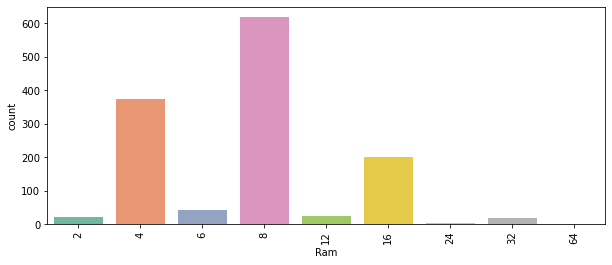

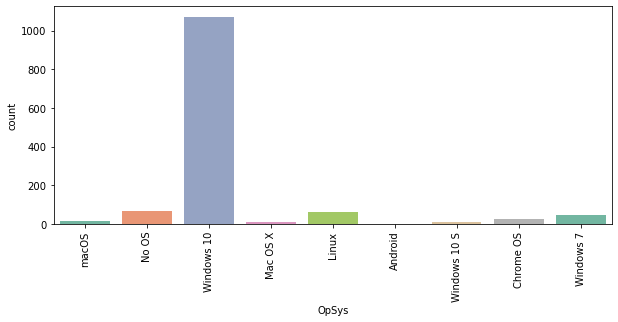

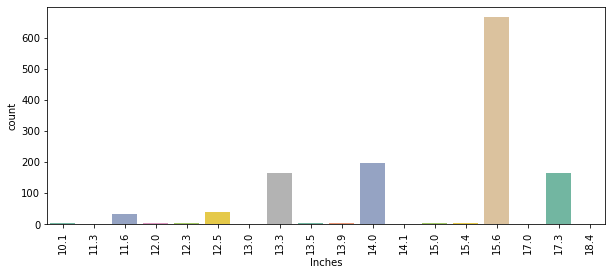

In [278]:
def drawing (col):
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=col,palette='Set2')
    plt.xticks(rotation='vertical')

    
topview =['Company', 'TypeName' , 'Ram', 'OpSys','Inches']
for col in topview:
    drawing(col)

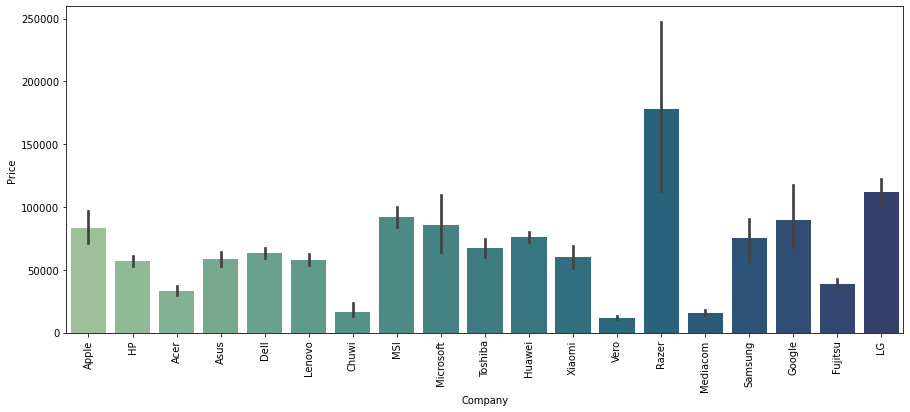

In [279]:
# avg price for each of the laptop brandas 


plt.figure(figsize=(15,6) )
sns.barplot(x=df['Company'] ,y=df['Price'] , palette='crest')
plt.xticks(rotation='vertical')
plt.show()

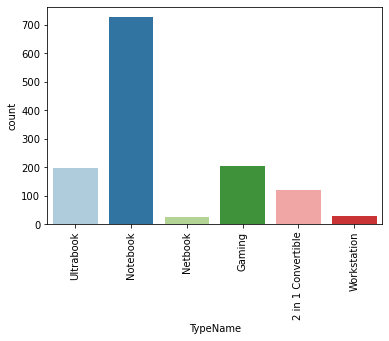

In [280]:
# Various types of laptop 

sns.countplot(data=df ,x='TypeName' , palette="Paired")
plt.xticks (rotation='vertical')
plt.show()

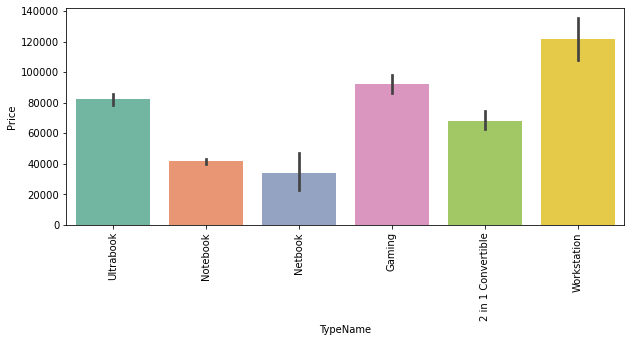

In [281]:
## laptop types and variation about the price 
plt.figure(figsize=(10,4))
sns.barplot(data=df , x='TypeName' ,y='Price', palette='Set2')
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='Inches', ylabel='Price'>

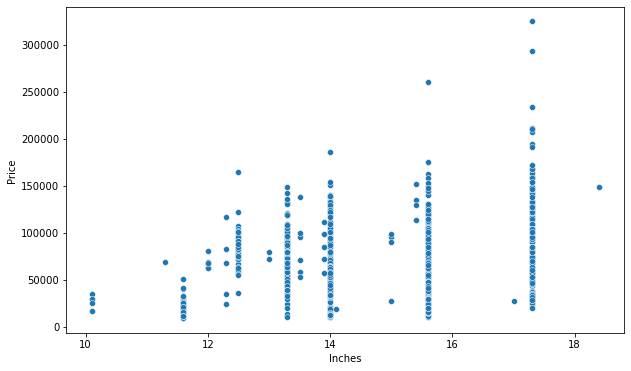

In [282]:
## variation of inches about the price 

plt.figure(figsize=(10,6))
sns.scatterplot(data=df , x= 'Inches', y= 'Price')


## For screen resolution coulmn we have many types

In [283]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [284]:
# Creating a new coulmn named as 'Touchscreen' if the is Touchscreen so this elment have value 'One' else 'Zero' 
df['Touchscreen']= df['ScreenResolution'].apply(lambda element:1
                                                 if 'Touchscreen' in element else 0)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [285]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1042,Toshiba,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,16,256GB SSD,Nvidia GeForce 930M,Windows 10,2.40,75924.0000,0
40,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 620,Linux,2.00,20725.9200,0
647,Razer,Gaming,14.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95,138474.7200,0
403,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Linux,2.50,46833.1200,0
169,HP,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4,500GB HDD,Intel UHD Graphics 620,Windows 10,1.49,40173.1200,0
967,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.04,36496.8000,0
1063,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16,2TB HDD,AMD Radeon R7 M445,Windows 10,2.32,52746.6672,0
737,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,1TB HDD,Intel UHD Graphics 620,Windows 10,1.55,35111.5200,1
1214,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.90,103842.7200,0
1292,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,500GB HDD,Intel HD Graphics,Windows 10,2.20,20193.1200,0


<AxesSubplot:xlabel='Touchscreen', ylabel='count'>

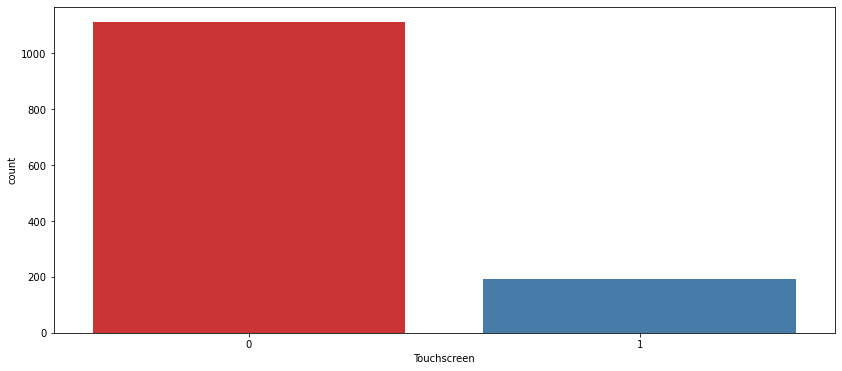

In [286]:
plt.figure(figsize=(14,6))
sns.countplot(data=df , x='Touchscreen',palette="Set1")

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

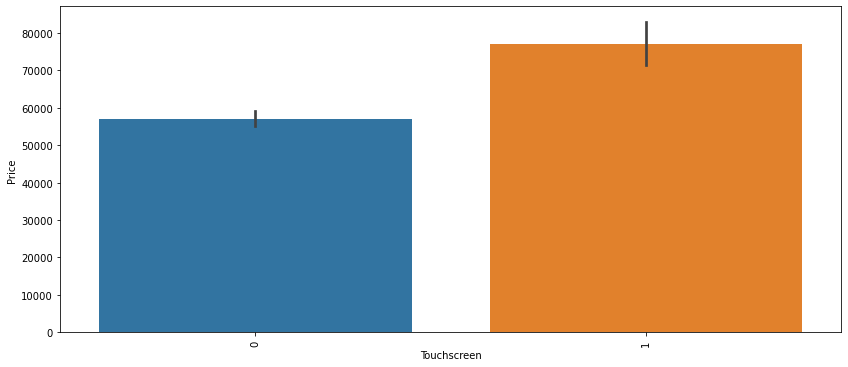

In [287]:
##  Touchscreen on comprision with price of laptop 
plt.figure(figsize=(14,6))

sns.barplot(x=df['Touchscreen'],y=df['Price'] )
plt.xticks(rotation='vertical')

In [288]:
# Creating a new coulmn named as 'Ips' if the is 'Ibs' so this elment have value 'One' else 'Zero' 
df['IPS']= df['ScreenResolution'].apply(lambda element: 1
                                                 if 'IPS' in element else 0)

df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
792,Lenovo,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.37,104961.6000,1,1
501,HP,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,256GB SSD,AMD Radeon 520,Windows 10,1.91,32979.7872,0,0
666,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.06,50882.4000,0,0
378,Asus,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.50,15238.0800,0,0
478,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,1TB HDD,AMD Radeon 520,Windows 10,2.20,35964.0000,0,0


<AxesSubplot:xlabel='IPS', ylabel='count'>

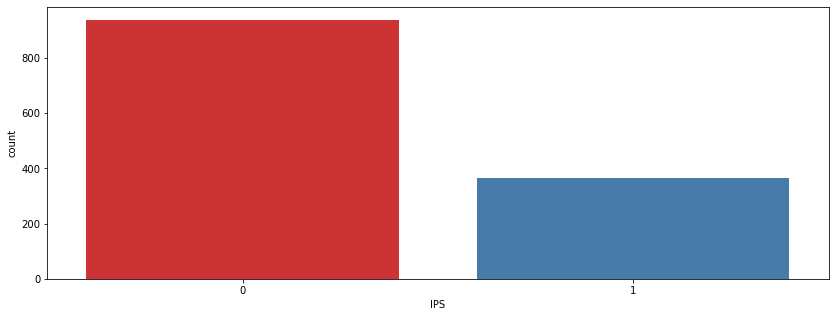

In [289]:
plt.figure(figsize=(14,5))
sns.countplot(data=df , x='IPS',palette="Set1")

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

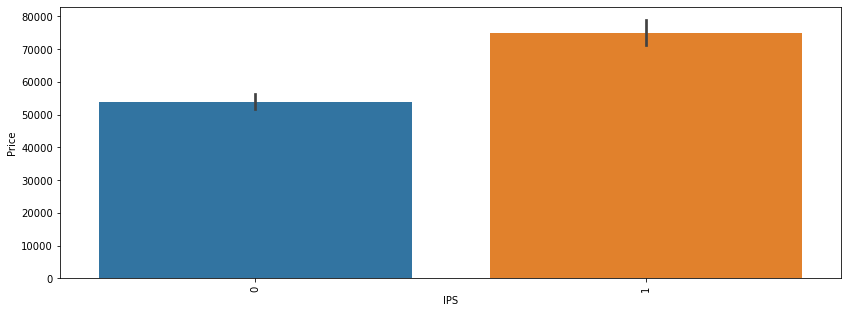

In [290]:
##  IPS on comprision with price of laptop 
plt.figure(figsize=(14,5))

sns.barplot(x=df['IPS'],y=df['Price'] )
plt.xticks(rotation='vertical')

## --------------------------------------------------------------------------------------------------------------------------------

## Etracting  The X resolution and the Y resolution 


In [291]:
splitdf = df['ScreenResolution'].astype(str).str.split( 'x' , n=1 , expand=True)
df['X_resolution']=splitdf[0]
df['Y_resolution']=splitdf[1]

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_resolution,Y_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [292]:
'''
remove any string in X_resolution and make the number alone :)
'''

df['X_resolution']=df['X_resolution'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df.tail()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_resolution,Y_resolution
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.64,1,1,1920,1080
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.72,1,1,3200,1800
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.12,0,0,1366,768
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.92,0,0,1366,768
1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,19660.32,0,0,1366,768


In [293]:
df['X_resolution']=df['X_resolution'].astype('int')
df['Y_resolution']=df['Y_resolution'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_resolution      1303 non-null   int32  
 14  Y_resolution      1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


<AxesSubplot:>

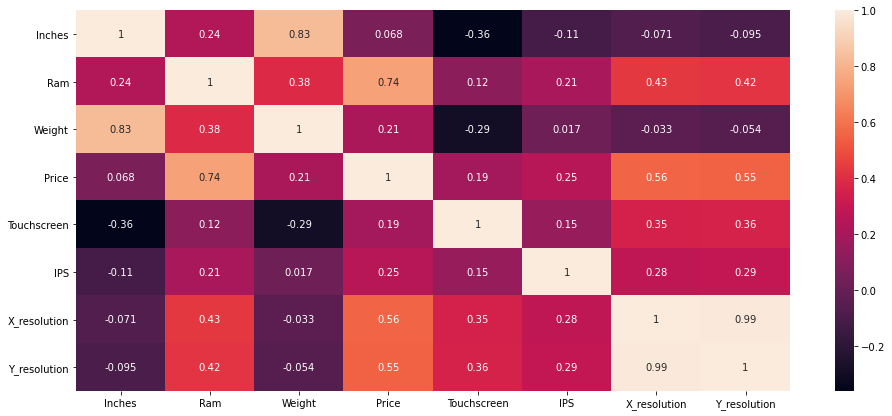

In [294]:
plt.figure (figsize=(16,7))
sns.heatmap(df.corr(),annot=True, cmap="rocket")

In [295]:
df.corr()['Price']

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
IPS             0.252208
X_resolution    0.556529
Y_resolution    0.552809
Name: Price, dtype: float64

##  Pixel PerInch
### PPI=(  (x_res)^2  + (y_res)^2  )  /  (  Inches  )

In [296]:
df['Pexel_Per_Inches']=(((df['X_resolution']**2 +df['Y_resolution']**2 )**0.5)/df['Inches'])
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_resolution,Y_resolution,Pexel_Per_Inches
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [297]:
df.corr()['Price']

Inches              0.068197
Ram                 0.743007
Weight              0.210370
Price               1.000000
Touchscreen         0.191226
IPS                 0.252208
X_resolution        0.556529
Y_resolution        0.552809
Pexel_Per_Inches    0.473487
Name: Price, dtype: float64

In [298]:
df.drop(columns=['X_resolution','Y_resolution','ScreenResolution','Inches'],inplace=True)

In [299]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Pexel_Per_Inches
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


## Now we finched work in Screen Resolution 
## --------------------------------------------------------------------------------------------------------------------------------

# Let's Work in next coulmn The CPU process 


In [300]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     134
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
AMD E-Series E2-9000 2.2GHz      1
Intel Core M M3-6Y30 0.9GHz      1
Intel Core M m7-6Y75 1.2GHz      1
Intel Core i5 7200U 2.70GHz      1
Intel Core i3 6100U 2.1GHz       1
Name: Cpu, Length: 118, dtype: int64

In [301]:
''' Now we see most Cpu have Intel Core i5,i7,Others
we need to make Cpu comapany alon and the i5,i7
'''
df['Cpu_Name']= df['Cpu'].apply(lambda text:" " .join(text.split() [:3]))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Pexel_Per_Inches,Cpu_Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [302]:
''' will make CPU have type of processor and classify into 3 text First have (core i7,i3,...,,...,)
And The Secound   will contain -----> 'Other Intel Types'
And Final 'Third' will contain -----> 'AMD processor'

'''

def processortype (text):
    
    if text =='Intel Core i5' or text=='Intel Core i3' or text=='Intel Core i7':
        return text 
    else :
        if text.split()[0]=='Intel':
            return 'Other Intel Types'
        else :
            return 'AMD processor '

df['processor_Tyeb'] = df['Cpu_Name'].apply(lambda text:processortype(text))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Pexel_Per_Inches,Cpu_Name,processor_Tyeb
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


In [303]:
# and then let's drob the coulmn we made before name is ---->'Cpu_Name'

df.drop(columns=['Cpu_Name'],inplace=True )
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Pexel_Per_Inches,processor_Tyeb
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


C:\Users\hossa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD processor '),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Types')])

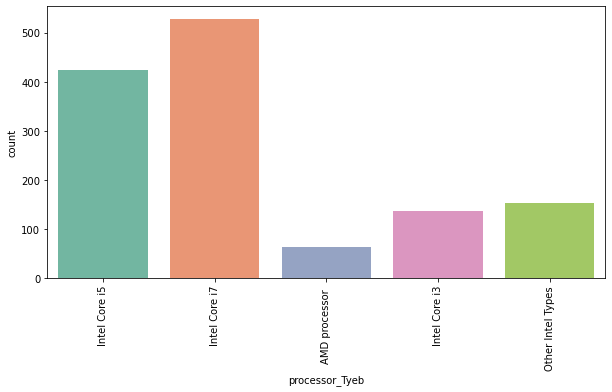

In [304]:
plt.figure(figsize=(10,5))
sns.countplot('processor_Tyeb',data=df, palette="Set2")
plt.xticks(rotation='vertical')

C:\Users\hossa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD processor '),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Types')])

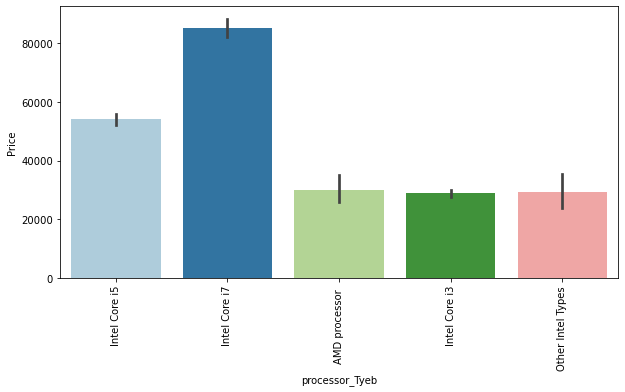

In [305]:
# Price vs processor variation 

plt.figure(figsize=(10,5))
x=df['processor_Tyeb']
y=df['Price']
sns.barplot(x,y,palette="Paired")
plt.xticks(rotation='vertical')

In [306]:
# LET'S REMOVE CPU COLMN 

df.drop(columns=['Cpu'],inplace=True )


In [307]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Pexel_Per_Inches,processor_Tyeb
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


## --------------------------------------------------------------------------------------------------------------------------------

# Let's Work with RAM for sometimes 
###  Let's have some fun With The RAM 

C:\Users\hossa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '2'),
  Text(1, 0, '4'),
  Text(2, 0, '6'),
  Text(3, 0, '8'),
  Text(4, 0, '12'),
  Text(5, 0, '16'),
  Text(6, 0, '24'),
  Text(7, 0, '32'),
  Text(8, 0, '64')])

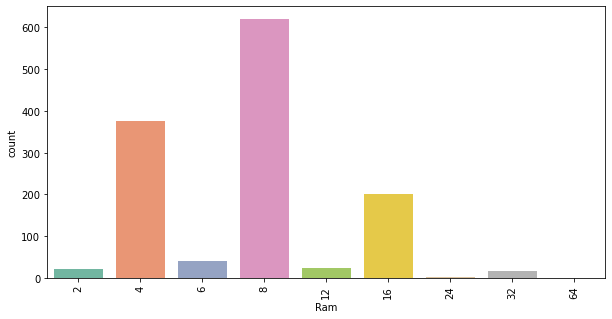

In [308]:
plt.figure(figsize=(10,5))
sns.countplot(df['Ram'],palette="Set2")
plt.xticks(rotation='vertical')

C:\Users\hossa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '2'),
  Text(1, 0, '4'),
  Text(2, 0, '6'),
  Text(3, 0, '8'),
  Text(4, 0, '12'),
  Text(5, 0, '16'),
  Text(6, 0, '24'),
  Text(7, 0, '32'),
  Text(8, 0, '64')])

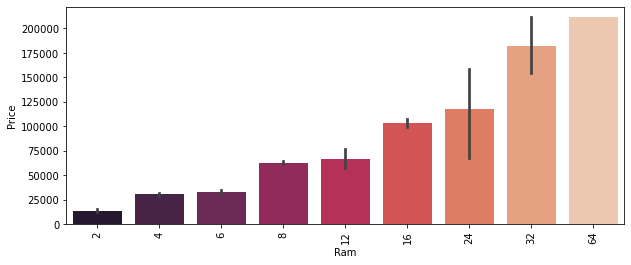

In [309]:
# Price with RAM

plt.figure(figsize=(10,4))
sns.barplot(df['Ram'],df['Price'],palette="rocket")
plt.xticks(rotation='vertical')


## Let's gooooo to The memory coulmn :))))))) 
### We wlill classify the memory into groups


In [310]:
# Let's see what data we deal with it to know how to classify the memory and delet this coulmn HEHEHE:)

df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
128GB SSD +  2TB HDD               2
1TB SSD +  1TB HDD                 2
8GB SSD                            1
5

In [311]:
''' 
now we know most common variants observed : HDD,SDD ,Flash and Hybrid
now let's deal with data itself 
'''
## first remove the decemal space 

df['Memory']=df['Memory'].astype(str).replace('\.0','' ,regex=True)

# 1.0TB----> will be ---> 1TB
## The Secound Will replace the GB wit " " ----> space

df['Memory']=df['Memory'].str.replace('GB','')

# 128GB -----> 128 

### Replace the TB with '000'

df['Memory']=df['Memory'].str.replace('TB','000')

#1.0TB ----> *after we remove decimal will be Like This----> 1000 

#### Split the word accross the " + " charcther 
 
splitdf= df['Memory'].str.split("+",n=0,expand=True)
splitdf


,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


## Create First Storage Memory in laptop 

In [312]:
df['first']=splitdf[0]
df['first']=df['first'].str.strip()
df.head(1)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Pexel_Per_Inches,processor_Tyeb,first
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD


In [313]:
## make a boolean coulmns for 4 comomn type of storage HDD,SDD ,Flash and Hybrid
def applyvalue(value):
    df['first '+value]=df['first'].apply(lambda x:1 if value in x else 0)

listtoapplyin =['HDD','SSD','Flash Storage','Hybrid']
for value in listtoapplyin:
    applyvalue(value)
df.head(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Pexel_Per_Inches,processor_Tyeb,first,first HDD,first SSD,first Flash Storage,first Hybrid
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,1,0


In [314]:
# keep number only in first column :)
df['first']=df['first'].str.replace(r'\D','')
df['first'].value_counts()

<ipython-input-314-78f33c0ed912>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first']=df['first'].str.replace(r'\D','')


256     508
1000    250
128     177
512     140
500     132
32       45
64       17
2000     16
16       10
180       5
8         1
508       1
240       1
Name: first, dtype: int64

## Create the Secound Storage Memory in laptop 

In [315]:
df['secound']=splitdf[1]
df['secound']=df['secound'].str.strip()
df.head(0)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Pexel_Per_Inches,processor_Tyeb,first,first HDD,first SSD,first Flash Storage,first Hybrid,secound


In [316]:
## make a boolean coulmns for 4 comomn type of storage HDD,SDD ,Flash and Hybrid
def applyvalue2(value):
    df['secound ' + value]=df['secound'].apply(lambda x:1 if value in x else 0)
listtoapplyin =['HDD','SSD','Flash Storage','Hybrid']

df['secound']=df['secound'].fillna("0")
 
for value in listtoapplyin :
    applyvalue2(value)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,...,first,first HDD,first SSD,first Flash Storage,first Hybrid,secound,secound HDD,secound SSD,secound Flash Storage,secound Hybrid
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,1,0,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256,0,1,0,0,0,0,0,0,0


In [317]:
# remove string from secound "hn5ly al numbers alone "
df['secound']=df['secound'].str.replace(r'\D','')

df.sample(10)

<ipython-input-317-585f5dd53c88>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['secound']=df['secound'].str.replace(r'\D','')


,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,...,first,first HDD,first SSD,first Flash Storage,first Hybrid,secound,secound HDD,secound SSD,secound Flash Storage,secound Hybrid
474,Asus,Notebook,12,128 SSD + 1000 HDD,Intel HD Graphics 530,Windows 10,2.06,69210.72,0,1,...,128,0,1,0,0,1000,1,0,0,0
1211,Asus,Notebook,16,128 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,2.20,93186.72,0,0,...,128,0,1,0,0,1000,1,0,0,0
447,Dell,Workstation,8,64 Flash Storage + 1000 HDD,Nvidia Quadro M620,Windows 10,2.23,106187.04,0,0,...,64,0,0,1,0,1000,1,0,0,0
951,Dell,Ultrabook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.36,94572.00,0,0,...,256,0,1,0,0,0,0,0,0,0
1258,Lenovo,Notebook,8,1000 Hybrid,AMD Radeon R5 M330,Windows 7,2.32,47685.60,0,0,...,1000,0,0,0,1,0,0,0,0,0
930,Lenovo,Notebook,4,1000 HDD,Intel HD Graphics 505,Windows 10,2.20,16463.52,0,0,...,1000,1,0,0,0,0,0,0,0,0
899,Dell,Notebook,8,500 HDD,Intel HD Graphics 620,Windows 10,1.90,49816.80,0,0,...,500,1,0,0,0,0,0,0,0,0
590,Asus,2 in 1 Convertible,8,1000 HDD,Intel HD Graphics 520,Windows 10,2.20,39373.92,1,0,...,1000,1,0,0,0,0,0,0,0,0
1051,HP,Notebook,8,1000 HDD,Nvidia GeForce 940MX,Windows 10,1.91,52161.12,0,1,...,1000,1,0,0,0,0,0,0,0,0
129,HP,Notebook,8,256 SSD,Intel UHD Graphics 620,Windows 10,2.50,49443.84,0,0,...,256,0,1,0,0,0,0,0,0,0


In [318]:
# multiply an elments and store in subsequent coulmns
# HDD taple
df['HDD']=(df['first']*df['first HDD']+df['secound']*df['secound HDD'])
df['SSD']=(df['first']*df['first SSD']+df['secound']*df['secound SSD'])
df['Flash Storage']=(df['first']*df['first Flash Storage']+df['secound']*df['secound Flash Storage'])
df['Hybrid']=(df['first']*df['first Hybrid']+df['secound']*df['secound Hybrid'])
df.sample(10)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,...,first Hybrid,secound,secound HDD,secound SSD,secound Flash Storage,secound Hybrid,HDD,SSD,Flash Storage,Hybrid
910,Dell,Notebook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.60,64202.4000,0,0,...,0,0,0,0,0,0,,256,,
564,Asus,Notebook,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050,Windows 10,2.50,44701.9200,0,0,...,0,1000,1,0,0,0,1000,128,,
1137,Dell,Notebook,8,1000 HDD,AMD Radeon R7 M445,Windows 10,2.50,41771.5200,0,0,...,0,0,0,0,0,0,1000,,,
934,Toshiba,Notebook,4,128 SSD,Intel HD Graphics 520,Windows 10,1.47,58874.4000,0,1,...,0,0,0,0,0,0,,128,,
318,HP,Notebook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.95,52214.4000,0,0,...,0,0,0,0,0,0,,256,,
186,Dell,Notebook,16,512 SSD,Nvidia GeForce GTX 1050,Windows 10,2.06,127712.1600,1,0,...,0,0,0,0,0,0,,512,,
290,Acer,Notebook,2,16 SSD,Intel HD Graphics,Chrome OS,2.19,10602.7200,0,0,...,0,0,0,0,0,0,,16,,
153,MSI,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,2.80,100699.2000,0,0,...,0,1000,1,0,0,0,1000,256,,
359,Dell,Notebook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.36,76030.5600,0,0,...,0,0,0,0,0,0,,256,,
38,HP,Notebook,4,1000 HDD,Intel HD Graphics 620,Windows 10,1.86,26037.4032,0,0,...,0,0,0,0,0,0,1000,,,


In [319]:
## Drop coulmn we didn't needed anymore :) 
df.drop(columns=['first','secound','first SSD','first HDD','first Flash Storage','first Hybrid','secound HDD',
                 'secound SSD','secound Flash Storage','secound Hybrid'],inplace =True )

df.drop(columns=['Memory'],inplace=True)

In [320]:
df.head(0)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Pexel_Per_Inches,processor_Tyeb,HDD,SSD,Flash Storage,Hybrid


In [321]:
df['HDD'] = pd.to_numeric(df['HDD'])
df['SSD'] = pd.to_numeric(df['SSD'])
df['Flash Storage'] = pd.to_numeric(df['Flash Storage'])
df['Hybrid'] = pd.to_numeric(df['Hybrid'])
df.sample(7)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Pexel_Per_Inches,processor_Tyeb,HDD,SSD,Flash Storage,Hybrid
334,Asus,Gaming,8,Nvidia GeForce GTX 1050,Windows 10,2.50,53226.7200,0,0,141.211998,Intel Core i7,NaN,256.0,NaN,NaN
263,Dell,Notebook,4,Intel HD Graphics 620,Windows 10,2.18,35004.9600,0,0,141.211998,Intel Core i5,1000.0,NaN,NaN,NaN
919,MSI,Gaming,8,Nvidia GeForce GTX 1050,Windows 10,2.20,59668.8048,0,0,141.211998,Intel Core i5,1000.0,128.0,NaN,NaN
350,Dell,Notebook,16,Nvidia GeForce GTX 1050,Windows 10,2.06,108020.9376,1,0,282.423996,Intel Core i7,NaN,512.0,NaN,NaN
815,Lenovo,Ultrabook,8,Intel HD Graphics 620,Windows 10,1.32,99047.5200,0,0,157.350512,Intel Core i7,NaN,256.0,NaN,NaN
1270,Lenovo,2 in 1 Convertible,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,NaN,128.0,NaN,NaN
343,Lenovo,2 in 1 Convertible,16,Intel UHD Graphics 620,Windows 10,1.40,111834.7200,1,1,316.965060,Intel Core i7,NaN,512.0,NaN,NaN


In [322]:
## Now let's see corr 
df.corr()['Price']

Ram                 0.743007
Weight              0.210370
Price               1.000000
Touchscreen         0.191226
IPS                 0.252208
Pexel_Per_Inches    0.473487
HDD                -0.023380
SSD                 0.010209
Flash Storage       0.705152
Hybrid              0.062157
Name: Price, dtype: float64

In [323]:
## From correlation Hybrid and flash storage are almost negliable, so we can simply drop them off 
### HDD have a -ve with price and that's true, the price in laptop incrassing when use SSD more than we used HDD 
# Drop columns Hybrid and flash storage 
df.drop(columns=['Flash Storage','Hybrid'],inplace =True)
df.head(0)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Pexel_Per_Inches,processor_Tyeb,HDD,SSD


# Now we are done with memmory stoeage Let's go next
## Go With GPU

In [324]:
# value_counts to see which most common and popular one 

df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia GeForce GTX 940M      1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Nvidia GeForce GTX 980       1
AMD Radeon RX 560            1
Name: Gpu, Length: 110, dtype: int64

In [325]:
# We will focus in brands
## spilt  to extract brand name 
# Example to extract brand name 

a= df['Gpu'].iloc[0]
print (a.split()[0])

Intel


C:\Users\hossa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Intel'),
  Text(1, 0, 'AMD'),
  Text(2, 0, 'Nvidia'),
  Text(3, 0, 'ARM')])

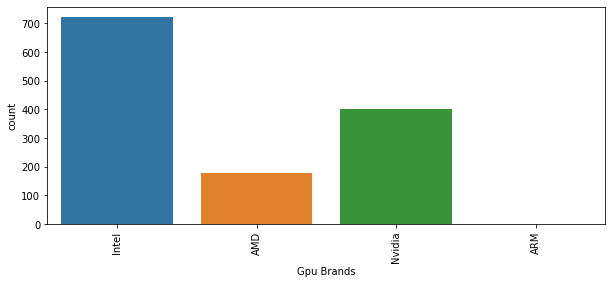

In [326]:
df['Gpu Brands']=df['Gpu'].apply(lambda x:x.split()[0])
plt.figure(figsize=(10,4))
sns.countplot(df['Gpu Brands'])
plt.xticks(rotation ='vertical')

C:\Users\hossa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gpu Brands', ylabel='count'>

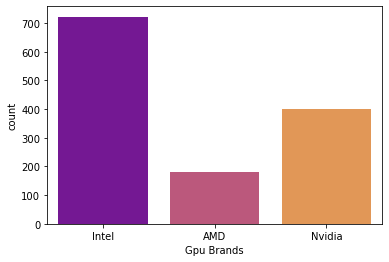

In [329]:
# removing the 'ARM' in tuple 
df=df[df['Gpu Brands']!='ARM']
sns.countplot(df['Gpu Brands'],palette="plasma")

C:\Users\hossa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gpu Brands', ylabel='Price'>

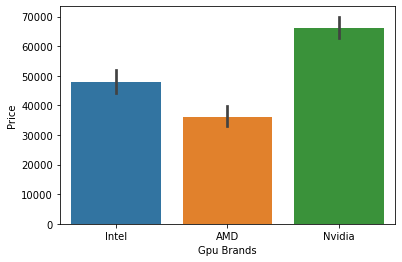

In [331]:
# Price Gpu analysis 
# used np.median to if there is any inpact of outlier or not
sns.barplot('Gpu Brands','Price',data=df,estimator=np.median)

In [332]:
df.drop(columns=['Gpu'])

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,Pexel_Per_Inches,processor_Tyeb,HDD,SSD,Gpu Brands
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,NaN,128.0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,NaN,NaN,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,NaN,256.0,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,NaN,512.0,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,NaN,256.0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,NaN,128.0,Intel
1299,Lenovo,2 in 1 Convertible,16,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,NaN,512.0,Intel
1300,Lenovo,Notebook,2,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Types,NaN,NaN,Intel
1301,HP,Notebook,6,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000.0,NaN,AMD


## OpSys analysis 

In [334]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Windows 10 S       8
Mac OS X           8
Android            2
Name: OpSys, dtype: int64

C:\Users\hossa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'macOS'),
  Text(1, 0, 'No OS'),
  Text(2, 0, 'Windows 10'),
  Text(3, 0, 'Mac OS X'),
  Text(4, 0, 'Linux'),
  Text(5, 0, 'Android'),
  Text(6, 0, 'Windows 10 S'),
  Text(7, 0, 'Chrome OS'),
  Text(8, 0, 'Windows 7')])

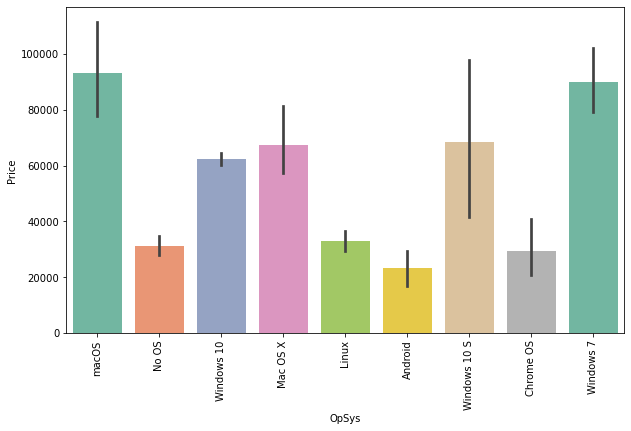

In [336]:
plt.figure(figsize=(10,6))
sns.barplot(df['OpSys'],df['Price'],palette="Set2")
plt.xticks(rotation='vertical')


In [338]:
# let's put all os in family 1-Windows 2- Mac 3- Other os 
def osfamily(text):
    if text =='Windows 10'  or text=='Windows 7' or text== 'Windows 10 S' :
        return 'Windows'
    elif text=='macOS' or text=='Mac OS X':
        return 'Mac'
    elif text=='Linux':
        return 'Linux'
    else :
        return 'Other OS'

df['OpSys']=df['OpSys'].apply(lambda x:osfamily(x))
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Pexel_Per_Inches,processor_Tyeb,HDD,SSD,Gpu Brands
1150,Lenovo,Notebook,4,Intel HD Graphics 520,Other OS,1.90,18061.920,0,0,100.454670,Intel Core i3,1000.0,NaN,Intel
485,Lenovo,Notebook,8,Intel UHD Graphics 620,Windows,1.75,55890.720,0,1,157.350512,Intel Core i5,NaN,256.0,Intel
391,Asus,Gaming,16,Nvidia GeForce GTX 1050 Ti,Windows,3.00,84768.480,0,0,127.335675,Intel Core i7,1000.0,256.0,Nvidia
1242,Acer,Notebook,4,Intel HD Graphics 520,Linux,2.40,19276.704,0,0,100.454670,Intel Core i3,500.0,NaN,Intel
177,MSI,Gaming,32,Nvidia GTX 980 SLI,Windows,4.40,149130.720,0,0,119.723216,Intel Core i7,1000.0,512.0,Nvidia


C:\Users\hossa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OpSys', ylabel='count'>

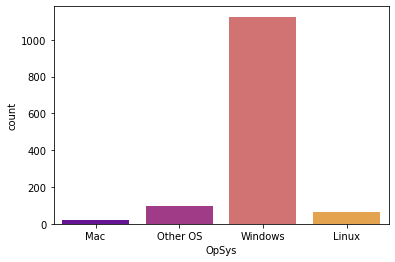

In [340]:
sns.countplot(df['OpSys'],palette="plasma")

C:\Users\hossa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Mac'),
  Text(1, 0, 'Other OS'),
  Text(2, 0, 'Windows'),
  Text(3, 0, 'Linux')])

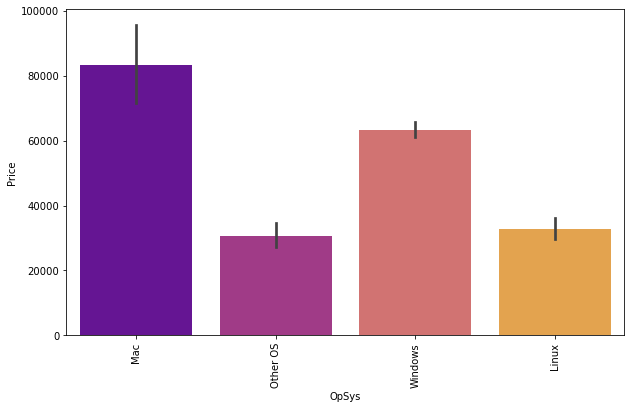

In [342]:

plt.figure(figsize=(10,6))
sns.barplot(df['OpSys'],df['Price'],palette="plasma")
plt.xticks(rotation='vertical')

## Weight analysis 

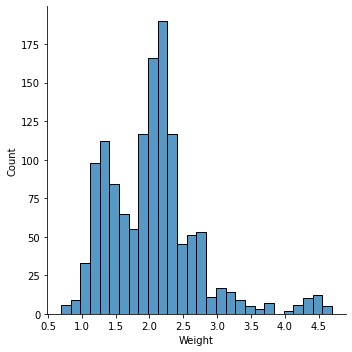

In [343]:
sns.displot(df['Weight'])

C:\Users\hossa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight', ylabel='Price'>

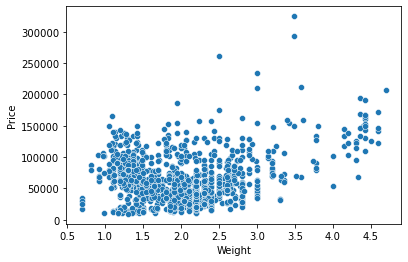

In [344]:
sns.scatterplot(df['Weight'],df['Price'])

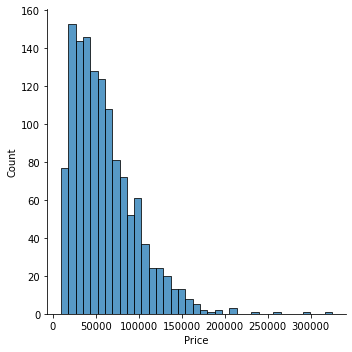

In [345]:
sns.displot(df['Price'])

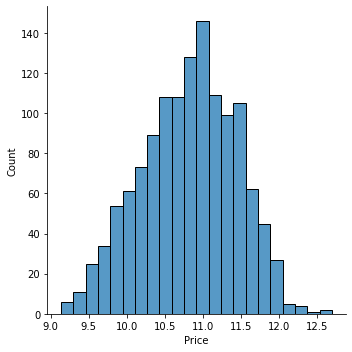

In [347]:
# gaussian distibution 
sns.displot(np.log(df['Price']))

In [349]:
# Corr price 

df.corr()['Price']

Ram                 0.742905
Weight              0.209867
Price               1.000000
Touchscreen         0.192917
IPS                 0.253320
Pexel_Per_Inches    0.475368
HDD                -0.023380
SSD                 0.010209
Name: Price, dtype: float64

<AxesSubplot:>

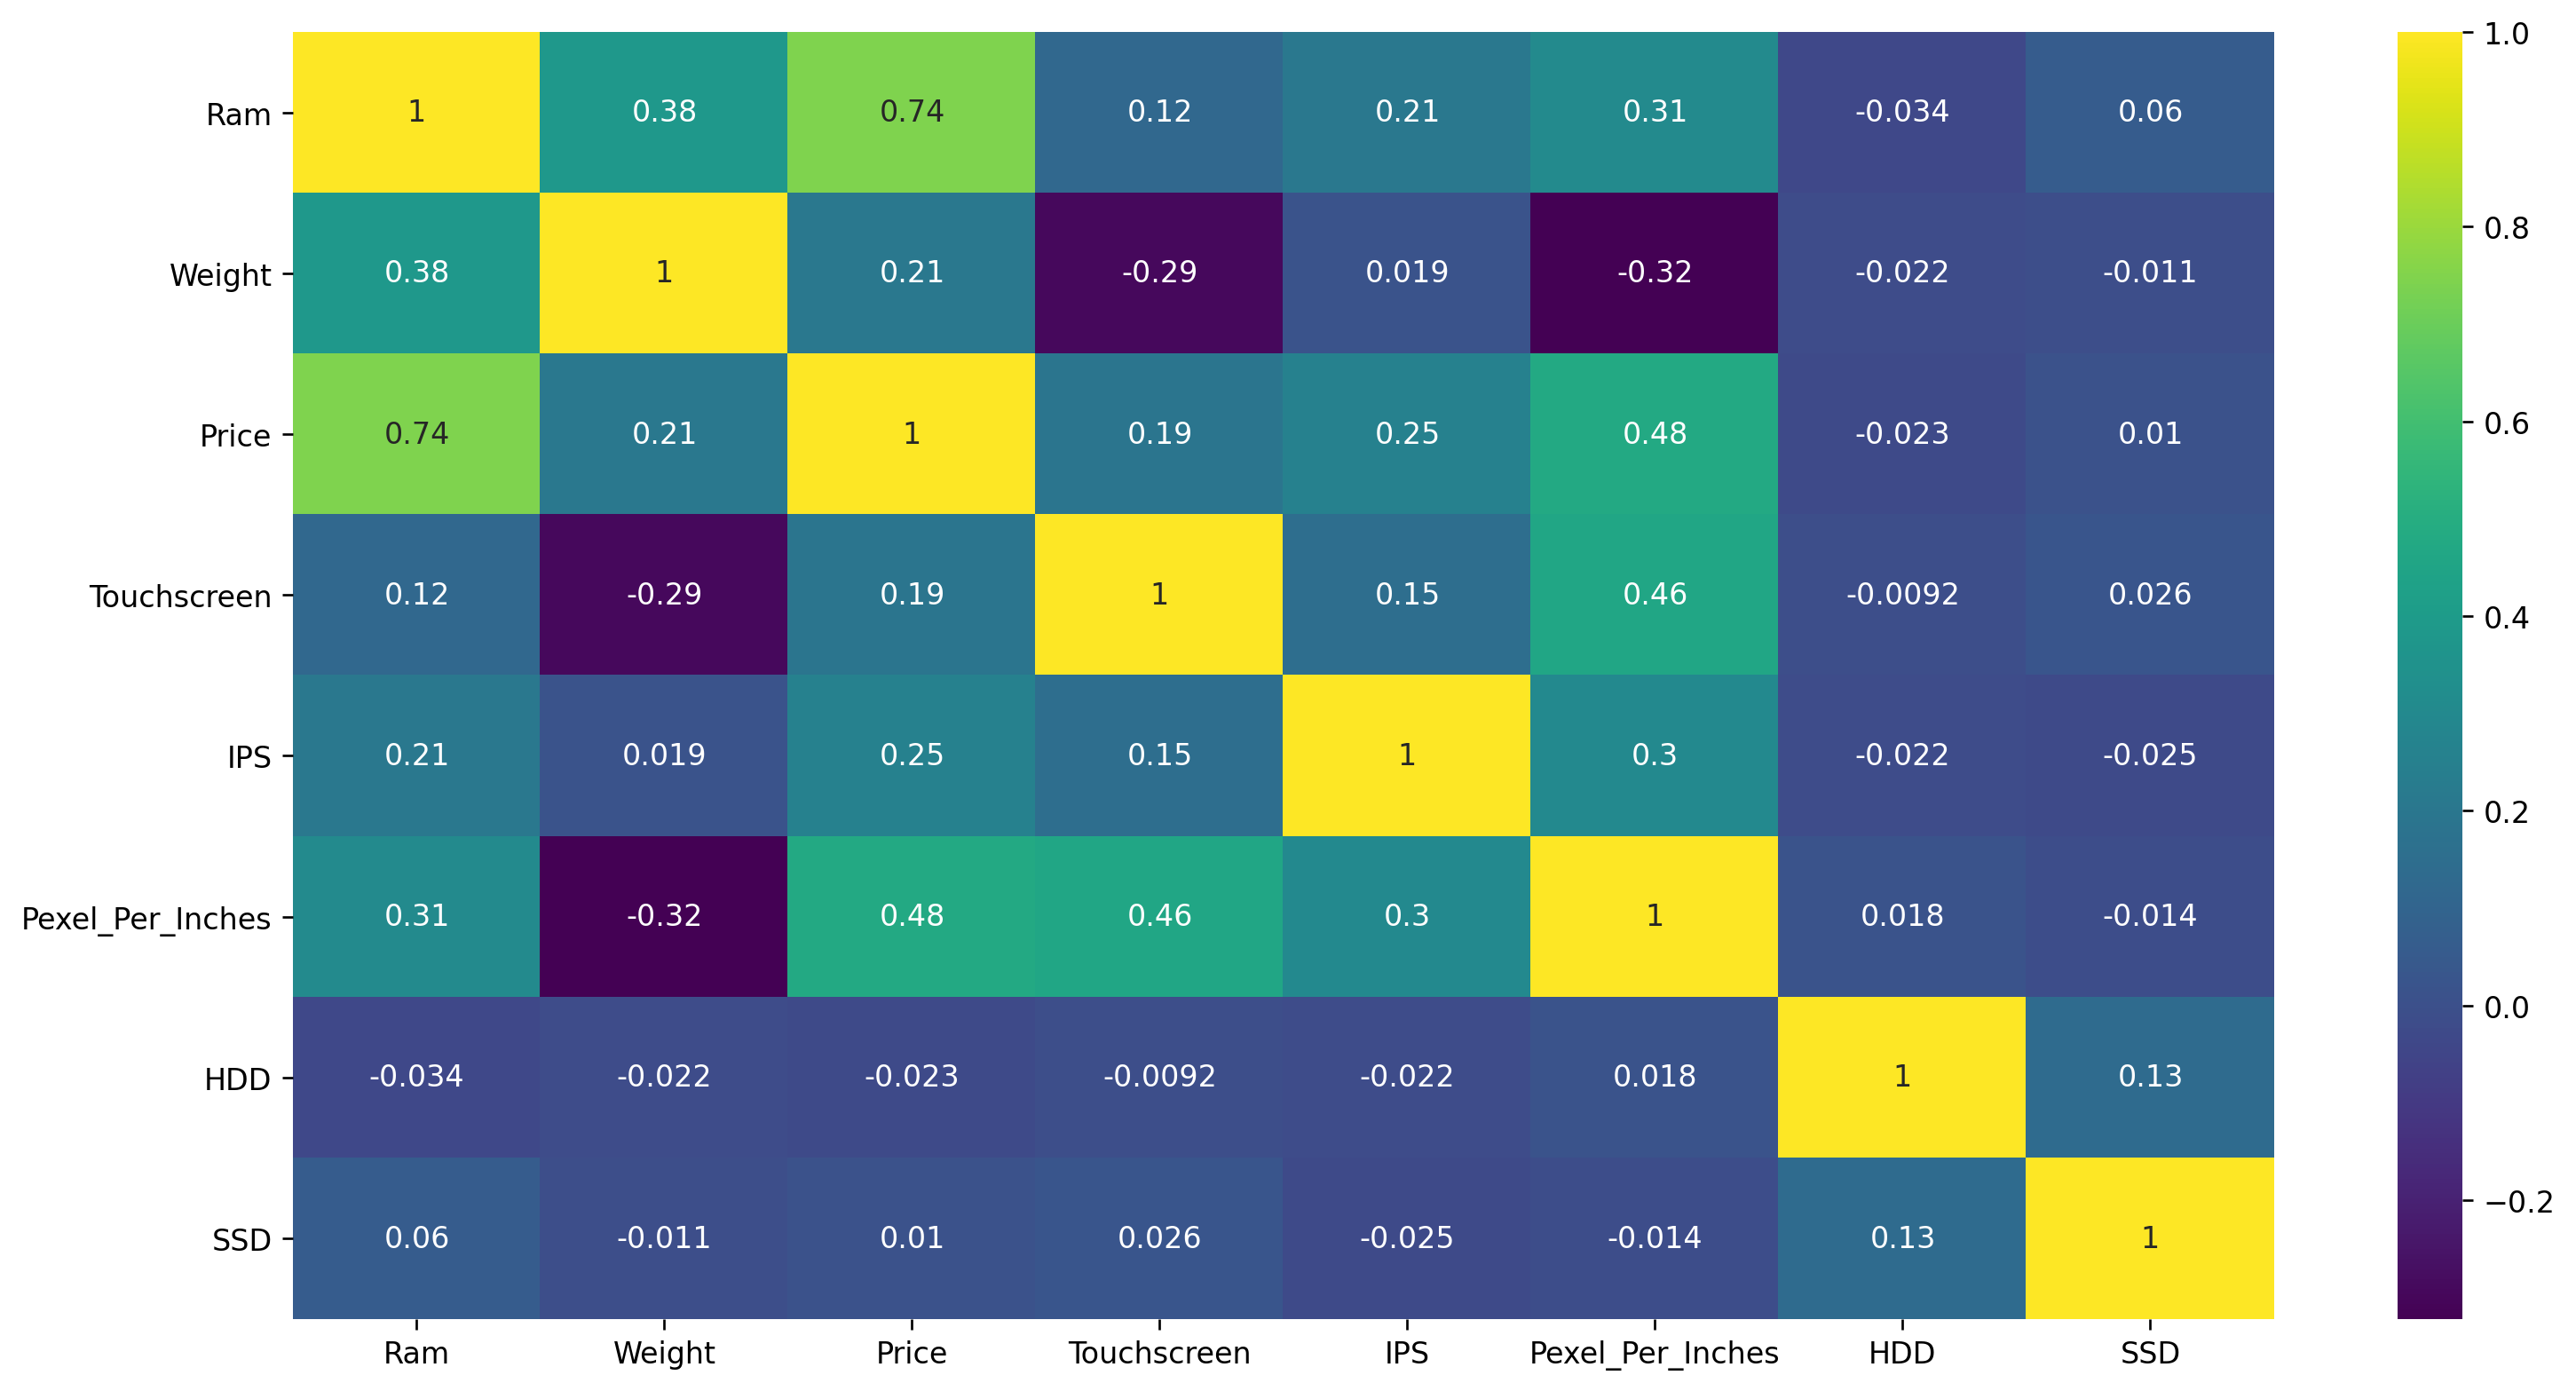

In [360]:
# Heat map for df
plt.figure(figsize=(15,8),dpi=240)
sns.heatmap(df.corr(),annot=True,cmap="viridis")

### Now we finghed our analysis data let's go with Modeling :)

# Model Building 